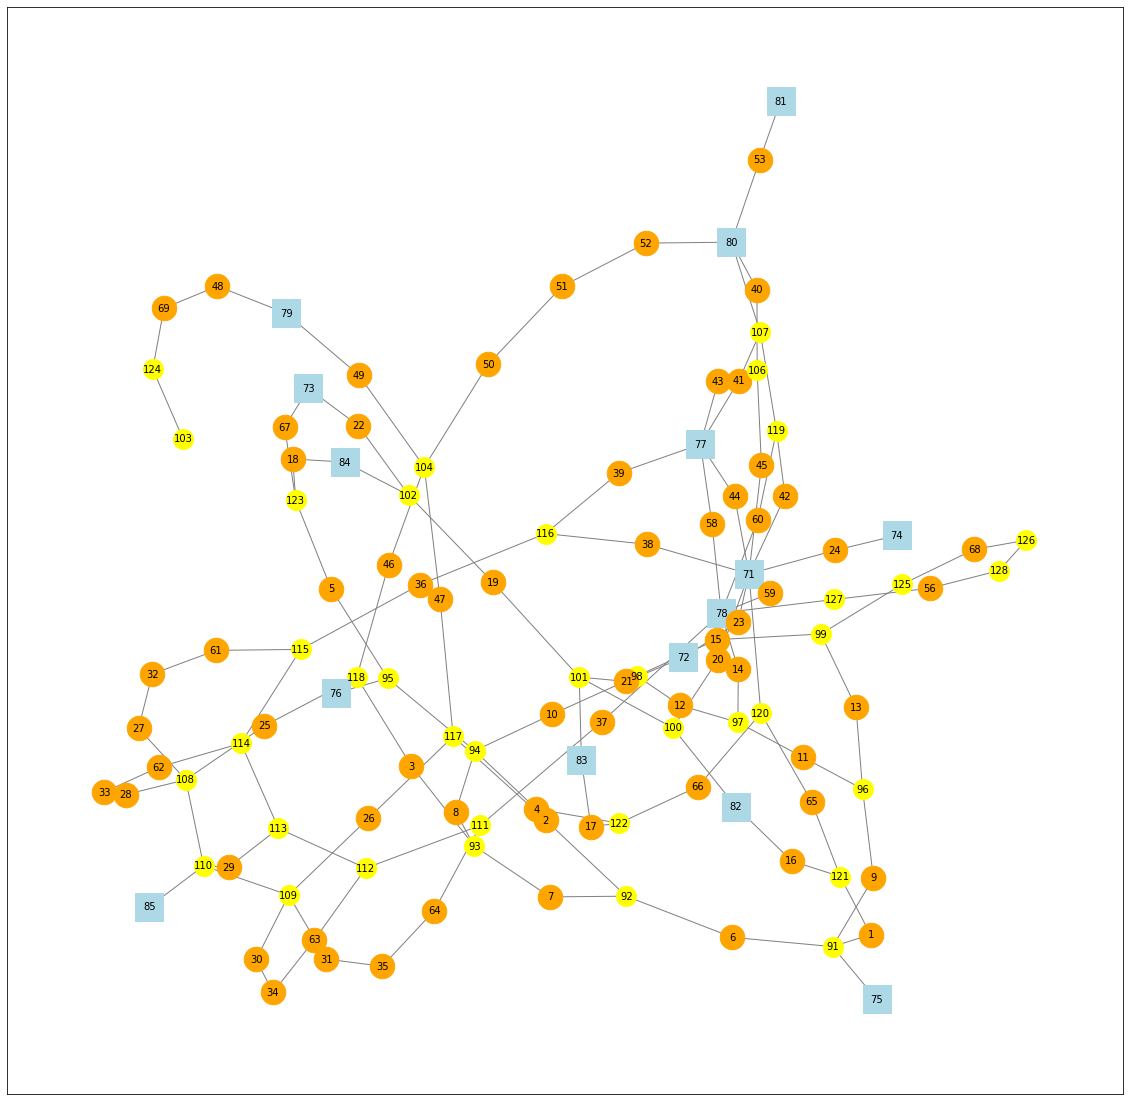

In [16]:
import re
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
f = open("Text1.txt")
lines = f.readlines()
lines = [l.strip() for l in lines]
for line in lines:
    if len(line) == 0 or line.startswith("!"):
        continue
    matches = re.findall(r"(\d+)", line)
    if len(matches) >= 2:
        G.add_edge(int(matches[0]), int(matches[1]))

node_types = {}
for i in range(1, 71):
    node_types[i] = 'valve'
for i in range(71, 91):
    node_types[i] = 'source'
for i in range(91, 129):
    node_types[i] = 'relation'

pos = nx.spring_layout(G, seed=30,scale=1)

# Define custom node shapes and sizes based on node types
custom_shapes = {
    'source': {'shape': 's', 'size': 800},
    'valve': {'shape': 'o', 'size': 600},
    'relation': {'shape': 'o', 'size':400}
}
plt.figure(figsize=(20,20))
# Draw nodes with custom shapes and colors
for node in G.nodes():
    shape = custom_shapes[node_types[int(node)]]['shape']
    size = custom_shapes[node_types[int(node)]]['size']
    color = 'lightblue' if node_types[int(node)] == 'source' else ('orange' if node_types[int(node)] == 'valve' else 'yellow')
    
    nx.draw_networkx_nodes(G, pos, nodelist=[node], 
                           node_shape=shape, 
                           node_color=color, 
                           node_size=size)

nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.show()

# Make makefile

In [72]:
import re
current_dir = 'C:\\Projects\\VSIM\\SimulationCore2\\'
target_dir = 'x64\\Debug\\'
depfilename = 'x64\Debug\SimulationCore2.dep'
depfile = open(depfilename,'r')
content = depfile.read()
deptexts = content.split('\n\n')
dependencies = {}
moddeps = {}
external_deps = []
deptexts = [dt for dt in deptexts if dt!='']

for depno,dept in enumerate(deptexts):
    headt,tailt = dept.split(': \\')
    headt,tailt = headt.strip(),tailt.strip()
    if headt.endswith('.mod'):
        ffile = tailt.replace(current_dir,'')
        mfiles = re.split(r' | \\\n',headt)
        for mfile in mfiles:
            moddeps[mfile.strip()] = ffile
for depno,dept in enumerate(deptexts):
    headt,tailt = dept.split(': \\')
    headt,tailt = headt.strip(),tailt.strip()
    if headt.endswith('.obj'):
        tails = re.split(r' \\\n| ',tailt)
        tails = [t for t in tails if t!='']
        head = tails[0].replace(current_dir,'')
        deps = []
        for t in tails[1:]:
            mfile = t.replace(target_dir,'')
            # if 'json_' in mfile:
            #     continue
            if mfile.strip() == '':
                print(f"!!! t = '{t}', ")
                
            if mfile in moddeps:
                deps.append(moddeps[mfile])
            else:
                external_deps.append(mfile)
                # print(f"{mfile} is not located")
            if head in deps:
                deps.remove(head)
        # print(f"making deps for {head}")
        dependencies[head]=deps

f = open('dependencies.txt','w')
f.write(str(dependencies))
f.close()

from graphlib import TopologicalSorter
ts = TopologicalSorter(dependencies)
files = tuple(ts.static_order())
for file in files:
    print("\t"+file.replace("\\","/")+" /")

	CSharp/OperationScenarios/Common/COperationScenariosVariables.f90 /
	TorqueDrag/TD_Modules/TD_WellGeometry.f90 /
	TorqueDrag/TD_Modules/TD_WellElements.f90 /
	TorqueDrag/TD_Modules/TD_StringConnectionData.f90 /
	TorqueDrag/TD_Modules/GeoElements_FluidModule.f90 /
	Rop/sROP_Variables.f90 /
	Rop/sROP_Other_Variables.f90 /
	FluidFlow/Flow_Startup_VARIABLES.f90 /
	CSharp/DownHole/CDownHoleTypes.f90 /
	Equipments/Drawworks/Drawworks_VARIABLES.f90 /
	Equipments/ChokeControl/CHOKE_VARIABLES.f90 /
	Equipments/TopDrive/TopDrive_VARIABLES.f90 /
	Equipments/RotaryTable/RTable_VARIABLES.f90 /
	Equipments/Pumps/Pumps_VARIABLES.f90 /
	CSharp/Warnings/CWarningsVariables.f90 /
	CSharp/StudentStation/CStudentStationVariables.f90 /
	CSharp/OperationScenarios/SoftwareInputsVariables.f90 /
	CSharp/OperationScenarios/UnitySignals/UnitySignalsVariables.f90 /
	CSharp/OperationScenarios/Permissions/PermissionsVariables.f90 /
	CSharp/OperationScenarios/Notifications/NotificationVariables.f90 /
	CSharp/Equipme

In [12]:
dir = 'CSharp/Equipments/ControlPanels'
import os
os.listdir(dir)
for f in os.listdir(dir):
    if f.endswith('Variables.f90'):
        continue
    print(dir+'/'+f)

CSharp/Equipments/ControlPanels/CBopControlPanel.f90
CSharp/Equipments/ControlPanels/CChokeControlPanel.f90
CSharp/Equipments/ControlPanels/CChokeManifold.f90
CSharp/Equipments/ControlPanels/CDataDisplayConsole.f90
CSharp/Equipments/ControlPanels/CDrillingConsole.f90
CSharp/Equipments/ControlPanels/CEquipmentsConstants.f90
CSharp/Equipments/ControlPanels/CHook.f90
CSharp/Equipments/ControlPanels/CHookActions.f90
CSharp/Equipments/ControlPanels/CStandPipeManifold.f90
CSharp/Equipments/ControlPanels/CTopDrivePanel.f90


In [54]:
dependencies['FluidFlow\\Well_Pressure_Data_Transfer.f90']

['FluidFlow\\Well_Pressure_Data_Transfer.f90',
 'FluidFlow\\Well_Pressure_Data_Transfer.f90',
 'FluidFlow\\kick\\Kick_VARIABLES.f90',
 'CSharp\\BasicInputs\\MudProperties.f90',
 'CSharp\\Equipments\\ControlPanels\\CDataDisplayConsole.f90',
 'CSharp\\ErrorLog\\CLog1.f90',
 'CSharp\\ErrorLog\\CError.f90',
 'CSharp\\Warnings\\CWarnings.f90',
 'CSharp\\OperationScenarios\\Unity\\CUnityOutputs.f90',
 'CSharp\\BasicInputs\\RigSpecifications\\CPumps.f90',
 'CSharp\\Equipments\\MudPathFinding\\CArrangement.f90',
 'CSharp\\Equipments\\MudPathFinding\\CStack.f90',
 'CSharp\\Equipments\\MudPathFinding\\CManifolds.f90',
 'TorqueDrag\\TD_Modules\\TD_WellGeometry.f90',
 'TorqueDrag\\TD_Modules\\TD_WellElements.f90',
 'TorqueDrag\\TD_Modules\\TD_StringConnectionData.f90',
 'TorqueDrag\\TD_Modules\\TD_GeneralData.f90',
 'TorqueDrag\\TD_Modules\\TD_DrillStem.f90',
 'TorqueDrag\\TD_Modules\\GeoElements_FluidModule.f90',
 'Rop\\sROP_Variables.f90',
 'Rop\\sROP_Other_Variables.f90',
 'FluidFlow\\Pressure_

assets={'USDT': {'Total': '5858.36917324', 'Free': 3879.35}, 'BUSD': {'Total': '-156.01984572', 'Free': 3877.23}}


# FromJson

In [1]:
# pattern="""		call json%get(pitem,data%Configuration%Pumps%@@@)
#         call json%get(p,"@@@",pitem)"""

# pattern="""		call json%get('Equipments.Drilling.@@@',data%Equipments%DrillingConsole%@@@,found)
# 		if ( .not. found ) print *,"Not found: @@@" """
pattern="""    call jsonfile%get('UnityInputs.@@@',data%Equipments%UnityInputs%@@@,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%@@@")"""
input = open("Text1.txt")
lines = input.readlines()
for line in lines:
	if '::' not in line:
		continue
	parts = line.split("::")
	if len(parts)!=2:
		continue
	name =  parts[1].split(' ')[1].strip()
	names = name.split(',')
	for name in names:
		newline = pattern.replace("@@@",name)
		print(newline)


    call jsonfile%get('UnityInputs.ElevatorConnectionPossible',data%Equipments%UnityInputs%ElevatorConnectionPossible,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%ElevatorConnectionPossible")
    call jsonfile%get('UnityInputs.JointConnectionPossible',data%Equipments%UnityInputs%JointConnectionPossible,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%JointConnectionPossible")
    call jsonfile%get('UnityInputs.IsKellyBushingSetInTable',data%Equipments%UnityInputs%IsKellyBushingSetInTable,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%IsKellyBushingSetInTable")
    call jsonfile%get('UnityInputs.ElevatorPickup',data%Equipments%UnityInputs%ElevatorPickup,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%ElevatorPickup")
    call jsonfile%get('UnityInputs.NearFloorPosition',data%Equipments%UnityInputs%NearFloorPosition,found)
    if ( .not. found ) call logg(4,"Not found: UnityInputs%NearFloorPosition")
    call json

# ToJson

In [2]:
#Artifical JSon
input = open("Text1.txt")
output = "{"
lines = input.readlines()
for line in lines:
    name =  line.split("::")[-1].strip()
    name = name.split(' ')[0]
    type = line.split("::")[0].strip()
    output += f"\"{name}\":0,\n" 
    # name = line.split("%")[-1][:-1]
    # print(name)
print(output+"}")

{"MudBucket":0,
"Elevator":0,
"FillupHead":0,
"Ibop":0,
"Kelly":0,
"MouseHole":0,
"OperationCondition":0,
"SafetyValve":0,
"operation":0,
"Slips":0,
"Slips_S":0,
"Swing":0,
"Swing_S":0,
"TdsBackupClamp":0,
"TdsSpine":0,
"TdsSwing":0,
"TdsTong":0,
"Tong":0,
"Tong_S":0,
"TdsConnectionModes":0,
"TdsElevatorModes":0,
}


In [2]:
precode = """call json%add(p,"",data%State%unitySignals%"""
input = open("Text1.txt")
lines = input.readlines()
for line in lines:
    name =  line.split("::")[-1].strip()
    name = name.split(' ')[0]
    icoute = precode.index("\"")+1
    # name = line.split("%")[-1][:-1]
    # print(name)
    newline = precode[:icoute]+name+precode[icoute:]+name+")"
    print(newline)


call json%add(p,"MudBucket",data%State%unitySignals%MudBucket)
call json%add(p,"Elevator",data%State%unitySignals%Elevator)
call json%add(p,"FillupHead",data%State%unitySignals%FillupHead)
call json%add(p,"Ibop",data%State%unitySignals%Ibop)
call json%add(p,"Kelly",data%State%unitySignals%Kelly)
call json%add(p,"MouseHole",data%State%unitySignals%MouseHole)
call json%add(p,"OperationCondition",data%State%unitySignals%OperationCondition)
call json%add(p,"SafetyValve",data%State%unitySignals%SafetyValve)
call json%add(p,"operation",data%State%unitySignals%operation)
call json%add(p,"Slips",data%State%unitySignals%Slips)
call json%add(p,"Slips_S",data%State%unitySignals%Slips_S)
call json%add(p,"Swing",data%State%unitySignals%Swing)
call json%add(p,"Swing_S",data%State%unitySignals%Swing_S)
call json%add(p,"TdsBackupClamp",data%State%unitySignals%TdsBackupClamp)
call json%add(p,"TdsSpine",data%State%unitySignals%TdsSpine)
call json%add(p,"TdsSwing",data%State%unitySignals%TdsSwing)
call j

In [2]:
precode = """call """
postcode = """ToJson(p)"""
input = open("Text1.txt")
lines = input.readlines()
for line in lines:
    name =  line.split("::")[-1].strip()
    # icoute = precode.index("\"")+1
    # name = line.split("::")[-1][:-1].strip()
    # print(name)
    newline = precode+name+postcode
    print(newline)


call BopControlPanelToJson(p)
call ChokeControlPanelToJson(p)
call ChokeManifoldToJson(p)
call DataDisplayConsoleToJson(p)
call DrillingConsoleToJson(p)
call HookToJson(p)
call StandPipeManifoldToJson(p)
call TopDrivePanelToJson(p)
call ! Drill WatchToJson(p)
call DrillingWatchToJson(p)
call TankToJson(p)


In [3]:
##Replace space with _ in filenames and list them for put them in makefile
import os
dir = 'Geo'
files = os.listdir(dir)
fstring = ''
for f in files:
    if f.endswith('90'):
        newf = f.replace(' ','_')
        os.rename(os.path.join(dir,f),os.path.join(dir,newf))
        if newf.lower().endswith('variables.f90'):
            fstring = '\t'+os.path.join(dir,newf).replace('\\','/') +' \\\n' + fstring
        else:
            fstring = fstring + '\t'+os.path.join(dir,newf).replace('\\','/') +' \\\n'

print(fstring)

	Geo/GeoMain.f90 \



## Extract variable names from definition lines

In [1]:
# %pwd
lines = input("Enter lines:").split("    ")
lines = [l.strip() for l in lines if len(l.strip())>0]
vars = []
for l in lines:
    if '::' in l:
        vars.append(l.split('::')[1].strip())

In [8]:
import string
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [9]:
import os
import sys
import re
dir = '.'
varNameChars = string.ascii_letters + '_'
log = open(os.path.join(dir,'ReplaceVars.log',),'a')
end=False
for dir,subdirs,files in os.walk(dir):
    for filename in files:
        if filename.lower().endswith('.f90'):
            # print(filename)
            file = open(os.path.join(dir,filename))
            code = file.read()
            for var in vars:
                if var not in code:
                    continue
                occurs = [m.start() for m in re.finditer(var, code)]
                for occurance in occurs:
                    if code[occurs[0]-1] in varNameChars or code[occurs[0]+len(var)] in varNameChars:
                        continue
                    print(f"var: {var}")
                    print(f"file = {os.path.join(dir,filename)}")
                    print(f"Char before: {code[occurs[0]-1]}")
                    print(f"Char after: {code[occurs[0]+len(var)]}")
                    end = True
    if end:
        break

var: AnnularRegulatorSetControl
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: AirMasterValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: ByePassValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: AnnularValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: UpperRamsValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: MiddleRamsValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: KillLineValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: ChokeLineValve
file = .\CSharp\Equipments\ControlPanels\CBopControlPanelVariables.f90
Char before:  
Char after: 

var: LowerRamsValve
file = .\CSh

In [9]:
f = open("hier.txt")
lines = f.readlines()
for line in lines[1:]:
    nsp=0
    while line[nsp]==' ':
        nsp+=1
    splits = line.split("::")
    print(splits[1].strip())

State
Hoisting
OperationScenario
notifications
permissions
unitySignals
StudentStation
BopStackInput
BopStackAcc
RamLine
AnnularComputational
Annular
PipeRam1
ShearRam
PipeRam2
ChokeLine
KillLine
Pumps
RAM
RAMS
Choke
AirDrivenPump
AirPumpLine
CHOOKE
Drawworks
MudSystem
MUD
PUMP
RTable
TDS
GasType(3)
PressureDisplay
ObservationPoint(:)
FricPressDrop
ROP_Spec
ROP_Bit
TDGeo
F_String(:)
F_Counts
F_Interval(:)
OD_Annulus(4)
TD_DrillStem
TD_DrillStems
TD_String
TD_Count
G_StringElement
TD_Vol
TD_General
TD_BOP
TD_BOPElement(4)
TD_StConn
TD_Load
TD_WellEl
TD_Casing
data%State%TD_Liner
TD_OpenHole
TD_ROPHole
TD_WellGeneral
TD_WellGeo(:)
EquipmentControl
BopControlPanel
ChokeControlPanel
ChokeManifold
DataDisplayConsole
DrillingConsole
Hook
StandPipeManifold
TopDrivePanel
DrillingWatch
Tank
Configuration
StringConfiguration
Formation
Reservoir
Shoe
Accumulator
BopStackSpecification
Hoisting
Power
PumpsSpecification
RigSize
CasingLinerChoke
PathGeneration
WellSurveyData
MudProperties
problems
Bi

IndexError: list index out of range

In [4]:
line

'type SimulationDataType     type(SimulationStateType)::State         Type(HoistingType)::Hoisting         type(OperationScenarioType)::OperationScenario         type(NotificationType)::notifications         type(PermissionsType):: permissions         type(UnitySignalsType):: unitySignals         type(StudentStationType)::StudentStation         type(BopStackInputType)::BopStackInput         type(BopStackAccType)::BopStackAcc         type(RamLineType)::RamLine         type(AnnularComputationalType)::AnnularComputational         type(AnnularType)::Annular         type(PipeRams1Type)::PipeRam1         type(ShearRamType)::ShearRam         type(PipeRam2Type)::PipeRam2         type(ChokeLineType)::ChokeLine         type(KillLineType)::KillLine         type(PumpsType)::Pumps         TYPE(BOP_TypeVars), DIMENSION(1:6) :: RAM         TYPE(BOP_TypeVars2D) :: RAMS                 type(ChokeType)::Choke         type(AirDrivenPumpType)::AirDrivenPump         type(AirPumpLineType)::AirPumpLine      

In [ ]:
for fn in modules:
    f = open(fn)
    lines = f.readlines()
    module_filenames = {}
    used_modules = []
    mod_count = 0
    for l in lines:
        l = l.strip().lower()
        if l.startswith('module ') and not l.startswith('module procedure '):
            mod_name = l.split(' ')[1]
            module_filenames[mod_name] = fn
            mod_count +=1
        if l.startswith('use'):
            used_modules.append(l.split(' ')[1])
    if mod_count !=1:
        print(f"{fn} has {mod_count} modules")
    module_filenames,used_modules

# Redis

In [2]:
import redis 
import time 
 
# Define the connection parameters 
redis_host = "127.0.0.1"
redis_port = 6379 
redis_password = "1qazxsw2$$" 
channelName = "f7e58e26-f9c0-44e7-8954-08dc093dd85d.ch" 
streamKey = "sampleStream" 
 
# Connect to the Redis server 
r = redis.Redis(host=redis_host, port=redis_port, password=redis_password) 
 
# Publish messages to the channel
while True:
    r.publish(channelName, "test")
    time.sleep(1)
# r.publish(channelName, "Hello from Server 2!") 
# r.publish(channelName, "Hello from Server 3!") 
# r.publish(channelName, "Hello from Server 4!")

KeyboardInterrupt: 

In [2]:
import redis

r = redis.Redis(host='localhost', port=6379,password='1qazxsw2$$')

# Create a pubsub instance
p = r.pubsub()

# Subscribe to a channel
p.subscribe('37364875-c9cf-43a3-de45-08dc0c6103c9.ch_out')

# Listen for messages
while True:
    message = p.get_message()
    if message:
        print('Received: ', message['data'])

Received:  1
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
Received:  b'Hello from FORTRAN!'
R

KeyboardInterrupt: 